# Aplicação de Random Forest para classificar câncer de mama baseado em características de célculas

Dataset disponível em: https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

Este dataset tem as seguintes características: Sample_code_number (id), Clump_thickness, Uniformity_of_cell_size, Uniformity_of_cell_shape, Marginal_adhesion, Single_epithelial_cell_size, Bare_nuclei, Bland_chromatin, Normal_nucleoli, Mitoses (rótulo. ```2 para benigno e 4 para maligno```).

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

nome_colunas = [
    'Sample_code_number', 'Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape',
    'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
    'Normal_nucleoli', 'Mitoses'
]

df = pd.read_csv('breast-cancer-wisconsin.data', names=nome_colunas)
print("o dataset tem",len(df),"linhas")
df.tail()

o dataset tem 699 linhas


,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
776715,3,1,1,1,3,2,1,1,1,2
841769,2,1,1,1,2,1,1,1,1,2
888820,5,10,10,3,7,3,8,10,2,4
897471,4,8,6,4,3,4,10,6,1,4
897471,4,8,8,5,4,5,10,4,1,4


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# Substitui '?' com NaN e remove linhas com valoures nulos na coluna Bare_nuclei
df.replace('?', pd.NA, inplace=True)
df.dropna(subset=['Bare_nuclei'], inplace=True)

# Convert todas as colunas em valores numéricos
df = df.apply(pd.to_numeric)

#vetor de evidências e vetor de saída
X = df.drop(['Sample_code_number', 'Mitoses'], axis=1)
y = df['Mitoses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])

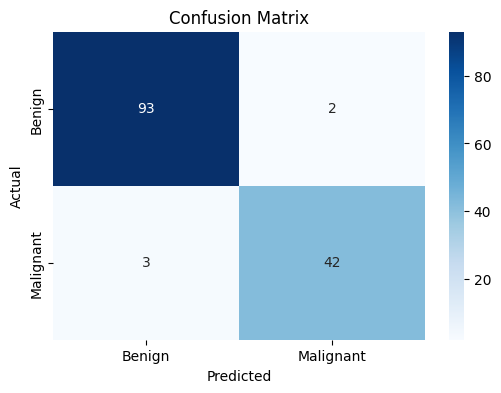

In [14]:
# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Visualizar a matriz de confusão usando Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
print(accuracy)

0.9642857142857143


In [16]:
print(report)

              precision    recall  f1-score   support

      Benign       0.97      0.98      0.97        95
   Malignant       0.95      0.93      0.94        45

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

